In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/penguins.csv

--2022-04-25 06:53:39--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/penguins.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.149.78
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.149.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15359 (15K) [text/csv]
Saving to: ‘penguins.csv’

penguins.csv        100%[===================>]  15.00K  --.-KB/s    in 0s      

2022-04-25 06:53:39 (195 MB/s) - ‘penguins.csv’ saved [15359/15359]



In [3]:
df = pd.read_csv('penguins.csv')

In [4]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [7]:
df['species'].value_counts() 

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [8]:
def missing_values_table(df):
        mis_val = df.isnull().sum()                                                 # Total missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)                         # Percentage of missing values
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)               # Make a table with the results
        mis_val_table_ren_columns = mis_val_table.rename(                           # Rename the columns
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[                      # Sort the table by percentage of missing descending
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"    # Print some summary information   
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns                                            # Return the dataframe with missing information

In [9]:
missing= missing_values_table(df)
missing

Your selected dataframe has 7 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
sex,11,3.2
culmen_length_mm,2,0.6
culmen_depth_mm,2,0.6
flipper_length_mm,2,0.6
body_mass_g,2,0.6


19

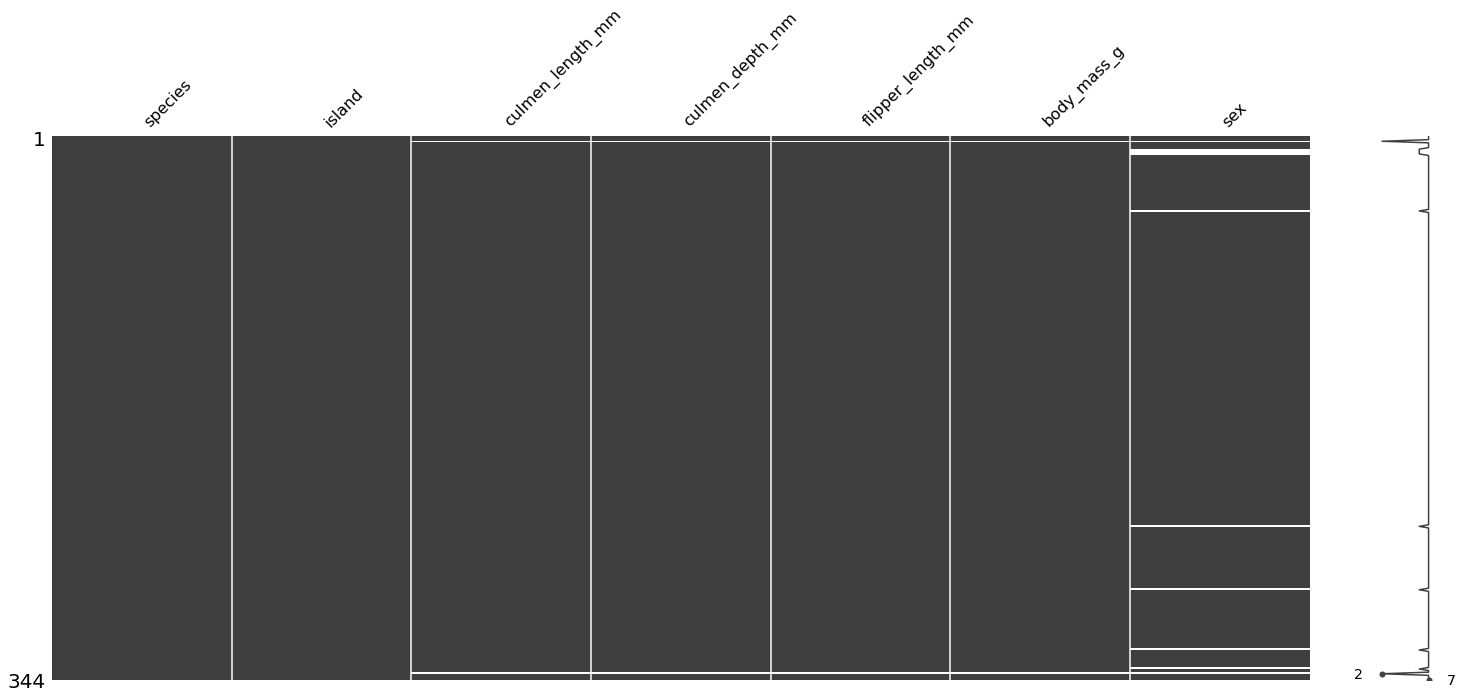

In [10]:
import missingno as msno   # creo il grafico nero con la distribuzione dei valori nulli
msno.matrix(df)
df.isnull().sum().sum()

In [11]:
df['culmen_length_mm'] = df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean())
df['culmen_depth_mm'] = df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean())
df['flipper_length_mm'] = df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean())
df['body_mass_g'] = df['body_mass_g'].fillna(df['body_mass_g'].mean())

In [12]:
df['sex'].value_counts() 

MALE      168
FEMALE    165
Name: sex, dtype: int64

In [13]:
df['sex']=df['sex'].fillna("MALE")

In [14]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [73]:
#EDA on Univariate Categorical variables

def cat_feat(col_data):
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
    fig.suptitle(col_data.name+' wise sale',fontsize=15)
    sns.countplot(col_data,ax=ax[0])
    col_data.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1], shadow = True)
    plt.tight_layout()

In [29]:
categorical_cols = ['species',"island","sex"]

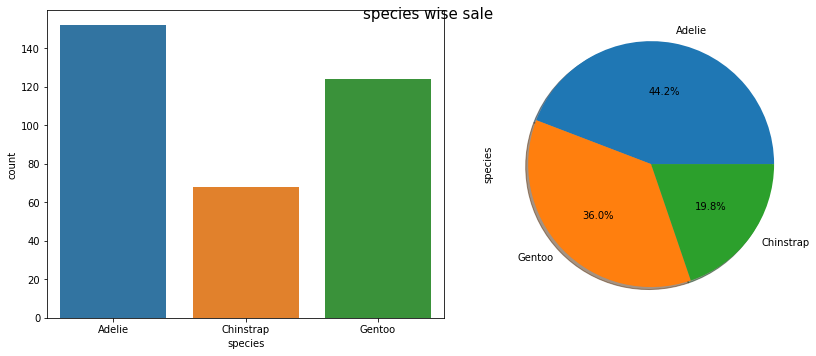

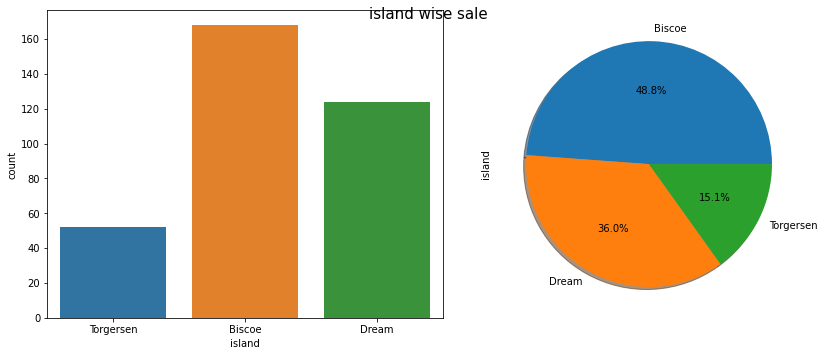

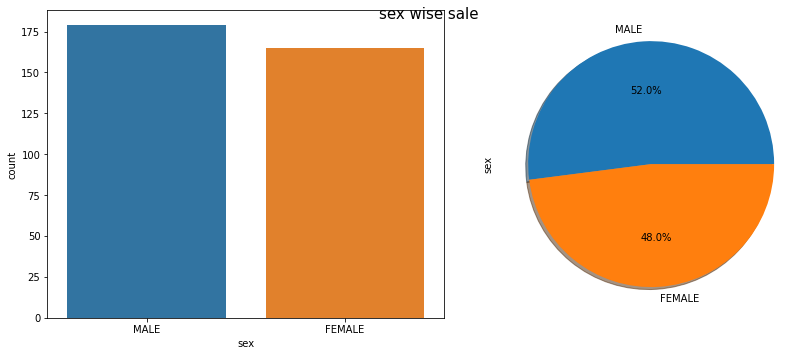

In [74]:
for i in categorical_cols:
    cat_feat(df[i])

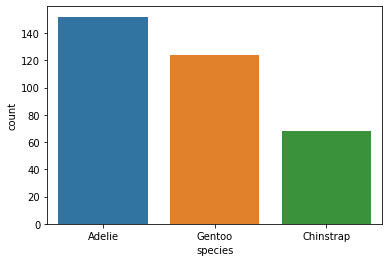

In [59]:
sns.countplot(x='species',data=df,order = df['species'].value_counts().index)

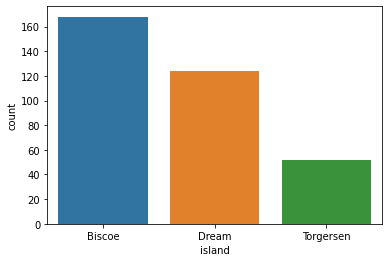

In [60]:
sns.countplot(x='island',data=df,order = df['island'].value_counts().index)

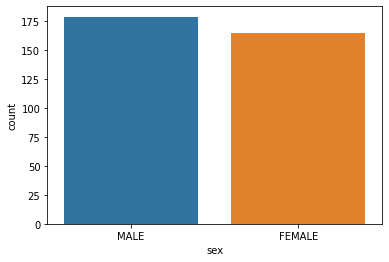

In [ ]:
sns.countplot(x='sex',data=df);

In [52]:
#Univariate analysis for numerical/continuos variables

def num_feat(col_data):
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
    sns.histplot(x = col_data, kde=True, ax=ax[0], color = 'purple')
    ax[0].axvline(col_data.mean(), color='r', linestyle='--',linewidth=2)
    ax[0].axvline(col_data.median(), color='k', linestyle='dashed', linewidth=2)
    ax[0].legend({'Mean':col_data.mean(),'Median':col_data.median()})
    sns.boxplot(x=col_data, showmeans=True, ax=ax[1])
    plt.xticks(rotation = 30)
    plt.tight_layout()
    plt.show()

In [53]:
numerical_cols = ['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm',"body_mass_g"]

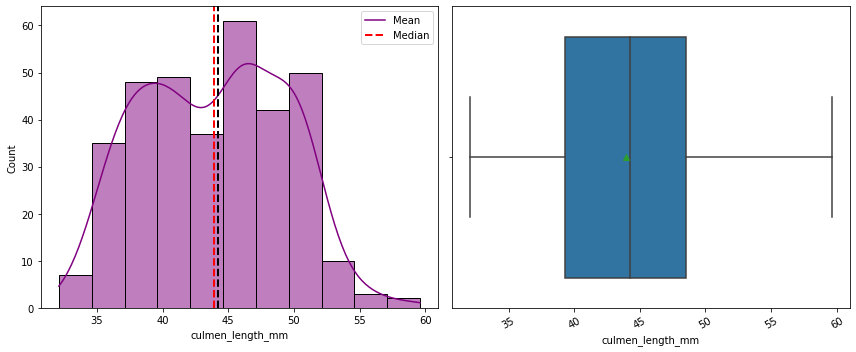

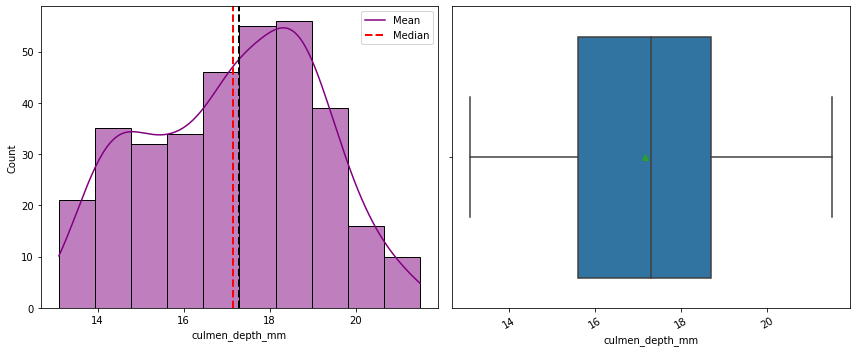

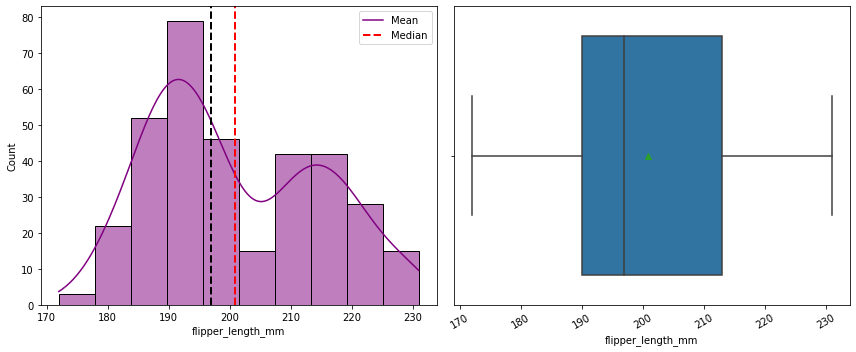

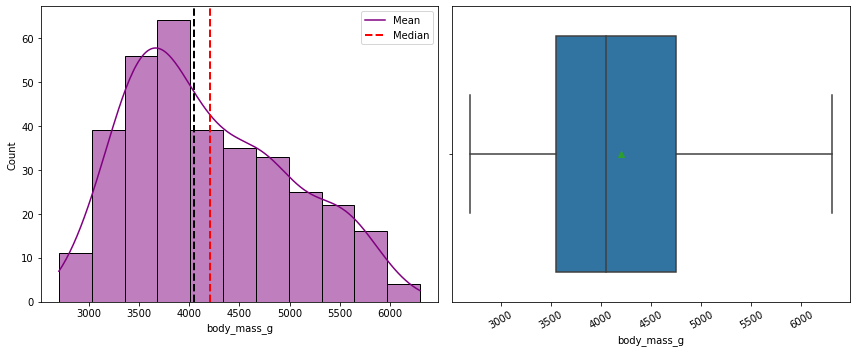

In [54]:
for i in numerical_cols:
    num_feat(df[i])

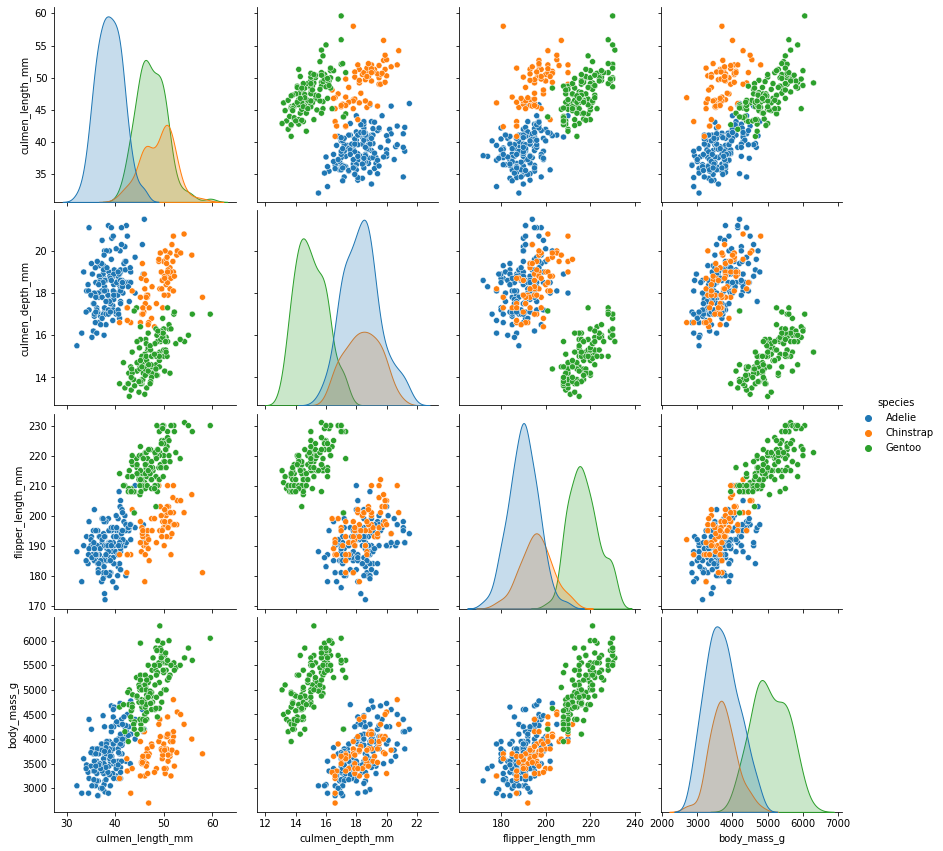

In [ ]:
sns.pairplot(df, hue='species', height=3, aspect=1);

In [ ]:
df['island'].value_counts() 

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [ ]:
df['species'] = df['species'].map({'Adelie':0,'Chinstrap':1,"Gentoo":2})

In [ ]:
df['sex'] = df['sex'].map({'MALE':0,'FEMALE':1})

In [ ]:
df['island'] = df['island'].map({'Biscoe':0,'Dream':1,"Torgersen":2})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    int64  
 1   island             344 non-null    int64  
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 18.9 KB


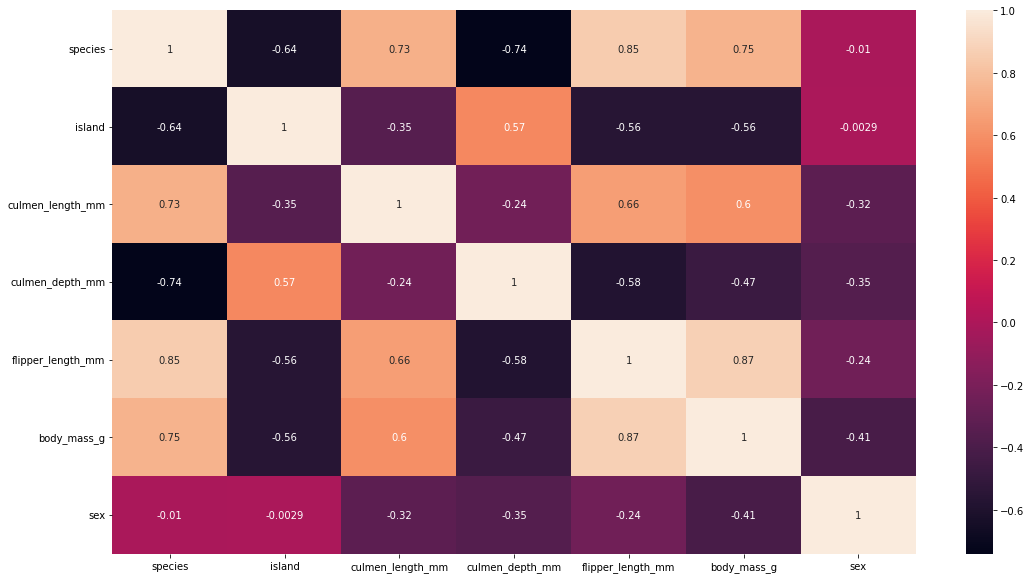

In [ ]:
import seaborn as sns
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True); 

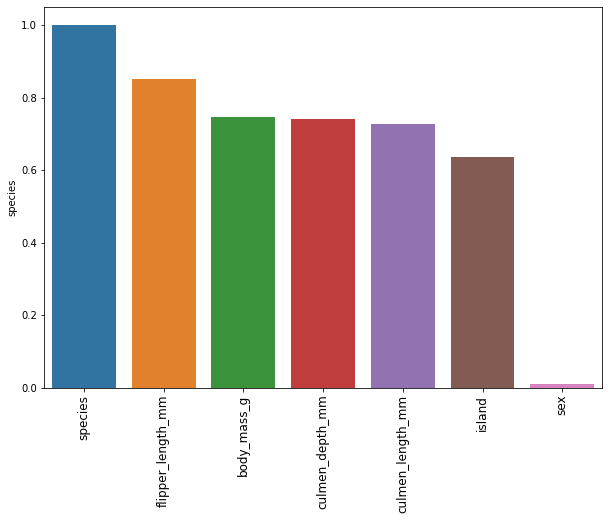

In [ ]:
# grafico di correlazione delle Features bar plot
price_corr = df.corr() ["species"].abs().sort_values(ascending=False)

plt.figure(figsize=(10,7))
sns.barplot(x=price_corr.index, y=price_corr)
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [ ]:
# separate the data and Label
X = df.drop('species',axis=1)
y=df['species']

In [ ]:
sc = StandardScaler()
standardized_data = sc.fit_transform(X)
X_ = standardized_data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_,y,
                                                    test_size = 0.2,
                                                    random_state=667
                                                    )

>1, train: 0.796, test: 0.797
>2, train: 0.978, test: 0.942
>3, train: 0.982, test: 0.942
>4, train: 0.985, test: 0.957
>5, train: 0.993, test: 0.986
>6, train: 1.000, test: 0.986
>7, train: 1.000, test: 0.986
>8, train: 1.000, test: 0.986
>9, train: 1.000, test: 0.986
>10, train: 1.000, test: 0.986
>11, train: 1.000, test: 0.986
>12, train: 1.000, test: 0.986
>13, train: 1.000, test: 0.986
>14, train: 1.000, test: 0.986
>15, train: 1.000, test: 0.986
>16, train: 1.000, test: 0.986
>17, train: 1.000, test: 0.986
>18, train: 1.000, test: 0.986
>19, train: 1.000, test: 0.986
>20, train: 1.000, test: 0.986


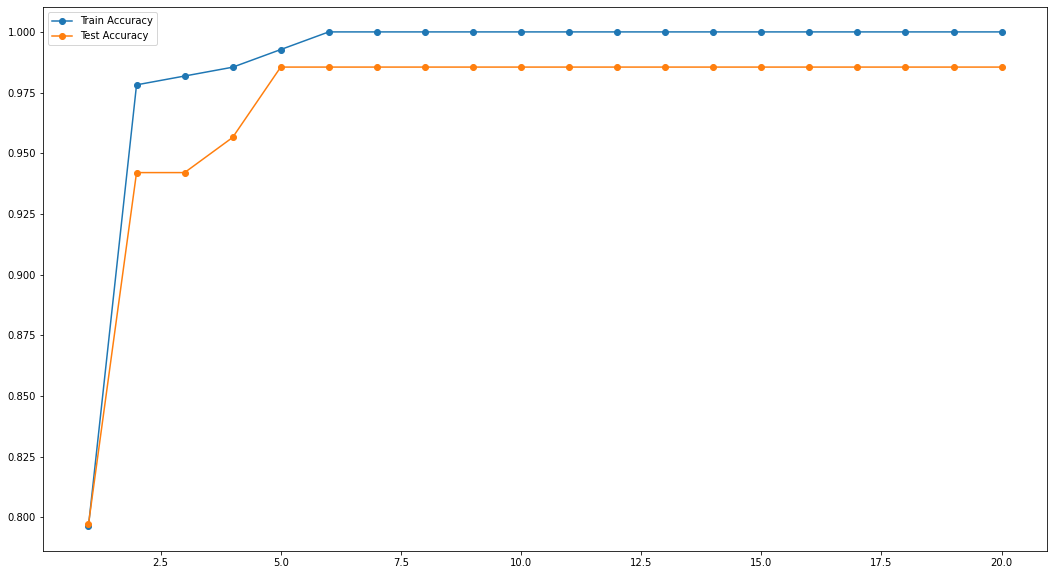

In [ ]:
from sklearn.ensemble import RandomForestClassifier

train_scores, test_scores = [],[]
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_y_pred = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_y_pred)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_y_pred = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_y_pred)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth

plt.figure(figsize=(18,10))
plt.plot(values, train_scores, '-o', label='Train Accuracy')
plt.plot(values, test_scores, '-o', label='Test Accuracy')
plt.legend()

In [ ]:
classifier = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=5)

In [ ]:
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=667)

Text(0.5, 0, 'Relative Importance')

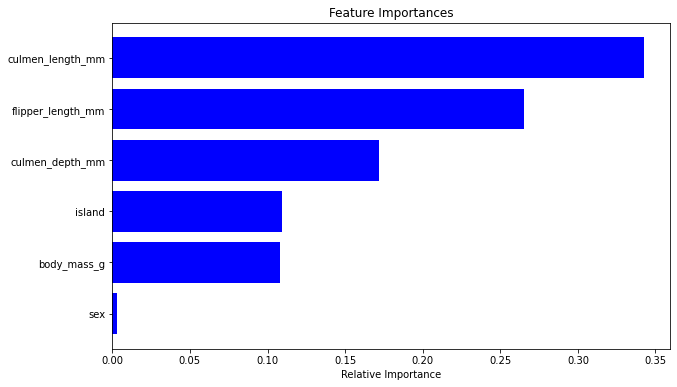

In [ ]:
#Feature importance for Random Forest
features = X.columns
importances = classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth=2)
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.9130434782608695

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=5)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.9855072463768116

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
gb_clf.score(X_test, y_test)

0.9855072463768116

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test, y_test)

1.0

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train,y_train)
nb_clf.score(X_test, y_test)

0.8985507246376812

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=2)
knn_clf.fit(X_train,y_train)
knn_clf.score(X_test, y_test)

1.0

In [ ]:
from sklearn.svm import SVC
svm_clf = SVC(probability=True)
svm_clf.fit(X_train,y_train)
svm_clf.score(X_test, y_test)

1.0

In [ ]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train,y_train)
xgb_clf.score(X_test, y_test)

0.9855072463768116

In [ ]:
labels = ['Adelie','Chinstrap',"Gentoo"]

In [ ]:
classifiers = [DecisionTreeClassifier(max_depth=2), 
               RandomForestClassifier(random_state=667, n_estimators=100,max_depth=5),
               GradientBoostingClassifier(n_estimators=100),
               LogisticRegression(max_iter=1000),
               GaussianNB(),
               KNeighborsClassifier(n_neighbors=2),
               SVC(probability=True),
               XGBClassifier()
               ]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=667)

for cls in classifiers:
    cls.fit(X_train, y_train)
    cls.predict(X_test)

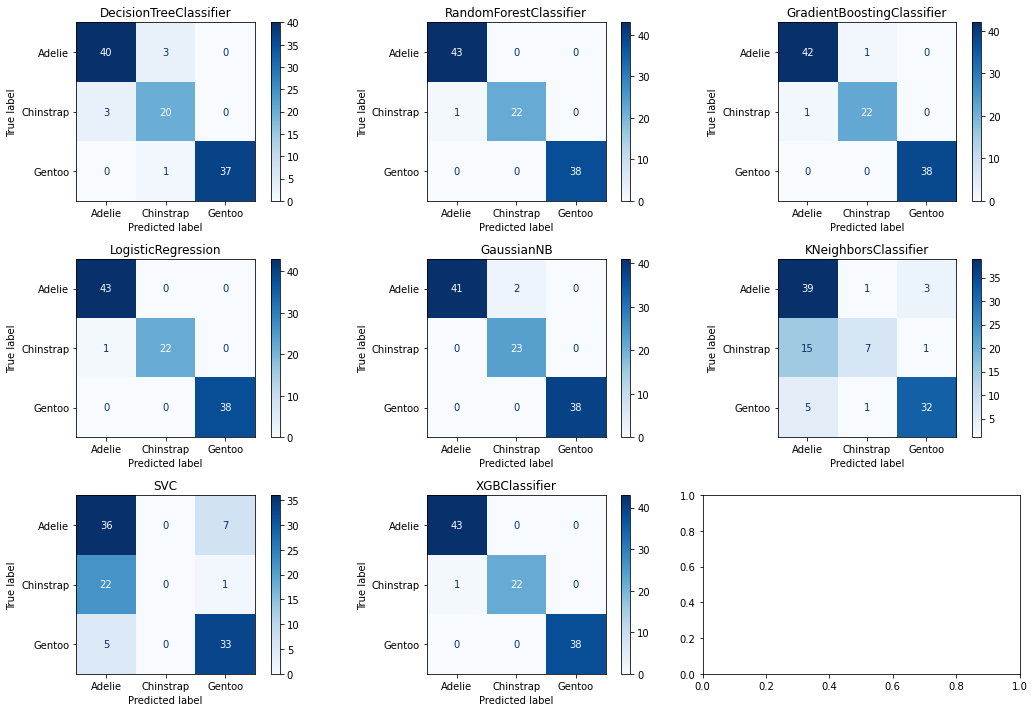

In [ ]:
from sklearn.metrics import plot_confusion_matrix

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))

for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues',
                         display_labels=labels)
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
#plt.show()

In [ ]:
from sklearn.metrics import classification_report
for cls, ax in zip(classifiers, axes.flatten()):
    print(cls)
    print(classification_report(y_test,cls.predict(X_test)))

DecisionTreeClassifier(max_depth=2)
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.83      0.87      0.85        23
           2       1.00      0.97      0.99        38

    accuracy                           0.93       104
   macro avg       0.92      0.92      0.92       104
weighted avg       0.93      0.93      0.93       104

RandomForestClassifier(max_depth=5, random_state=667)
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        43
           1       1.00      0.96      0.98        23
           2       1.00      1.00      1.00        38

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104

GradientBoostingClassifier()
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
          

In [ ]:
#FEATURE SELECTION CON MULTICLASSIFIER
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

featu=[]
for i in range(2,len(X.columns)):
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
    classifier = LogisticRegression(max_iter=10000)
    pipe = Pipeline([
                    ('scaler', StandardScaler()),
                    ('featureselection',rfe),
                    ('classifier',classifier)
                    ])
    pipe.fit(X_train,y_train)
    test_y_pred = pipe.predict(X_test)
    test_acc = accuracy_score(y_test, test_y_pred)
    f1 = f1_score(y_test, test_y_pred,average='macro')
    featu.append(f1)
    # summarize progress
    print('feature selected %d, Acc.Test: %.3f, F1: %.3f' % (i, test_acc, f1 ))

print('\n Best number of feature selection is: %d' % (np.argmax(featu) +2))

feature selected 2, Acc.Test: 0.933, F1: 0.923
feature selected 3, Acc.Test: 0.962, F1: 0.955
feature selected 4, Acc.Test: 0.971, F1: 0.966
feature selected 5, Acc.Test: 0.990, F1: 0.989

 Best number of feature selection is: 5


In [ ]:
# X = features not standardized
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    random_state=667
                                                    )

In [ ]:
standardize = StandardScaler()
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
classifier = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=5)

pipe = Pipeline([
                ('scaler', standardize),
                ('featureselection',rfe),
                ('classifier',classifier)
                ])
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('featureselection',
                 RFE(estimator=DecisionTreeClassifier(),
                     n_features_to_select=5)),
                ('classifier',
                 RandomForestClassifier(max_depth=5, random_state=667))])

In [ ]:
#['Adelie','Chinstrap',"Gentoo"]

In [ ]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10000,18.70000,181.000000,3750.000000,0
1,0,2,39.50000,17.40000,186.000000,3800.000000,1
2,0,2,40.30000,18.00000,195.000000,3250.000000,1
3,0,2,43.92193,17.15117,200.915205,4201.754386,0
4,0,2,36.70000,19.30000,193.000000,3450.000000,1
...,...,...,...,...,...,...,...
339,2,0,43.92193,17.15117,200.915205,4201.754386,0
340,2,0,46.80000,14.30000,215.000000,4850.000000,1
341,2,0,50.40000,15.70000,222.000000,5750.000000,0
342,2,0,45.20000,14.80000,212.000000,5200.000000,1


In [ ]:
input_data = [0,43.92,17.15,200.915,4201.75,0]

prediction = pipe.predict([input_data])
print(prediction[0])

if (prediction[0] == 0):
  print('Adelie')
elif (prediction[0] == 1):
  print('chinstrap')
else:
  print('Gentoo')

2
Gentoo


In [ ]:
import joblib
joblib.dump(pipe,'pipe_loan.pkl')

['pipe_loan.pkl']